# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


Here the `Unnamed: 0` & `id` columns doesn't add any values to the dataset. So we drop it.

In [ ]:
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

## Initial Checks
- Number of rows & columns
- Missing values
- Data types
- Class balance (check for imbalance)

In [3]:
print("Number of rows : ", df.shape[0])
print("Number of columns : ", df.shape[1])

Number of rows :  103904
Number of columns :  25


In [4]:
# Number of missing values in all columns
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [5]:
df.isnull().sum() / df.shape[0] * 100

Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

There are some missing values in the column “Arrival Delay in Minutes”. So there are approximately 0.3% missing values in the column “Arrival Delay in Minutes”. So we can handle this either using any of the methods below:

1. We can drop them.
2. We can impute the missing values using methods like mean, median, and mode or something more sophisticated like KNN imputation.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

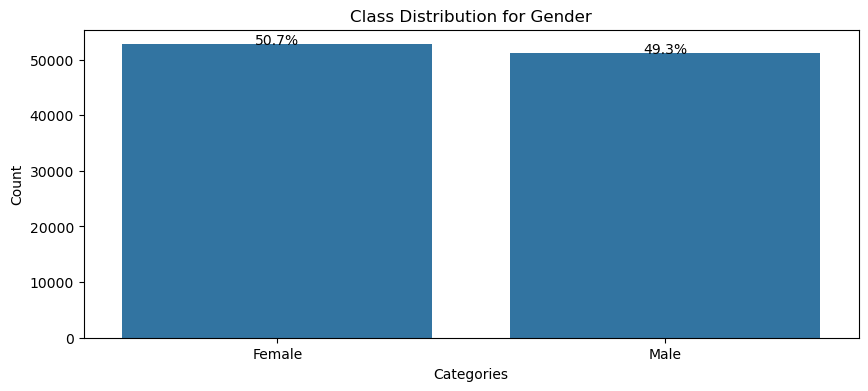

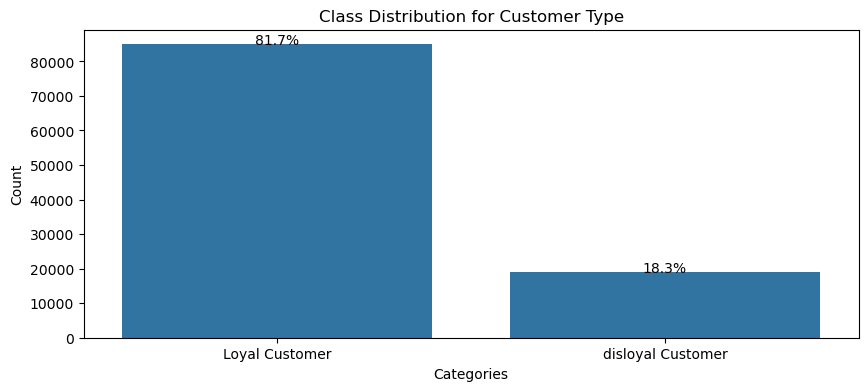

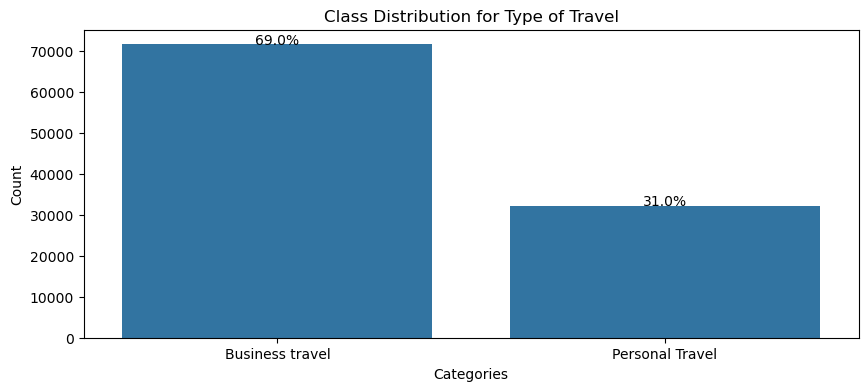

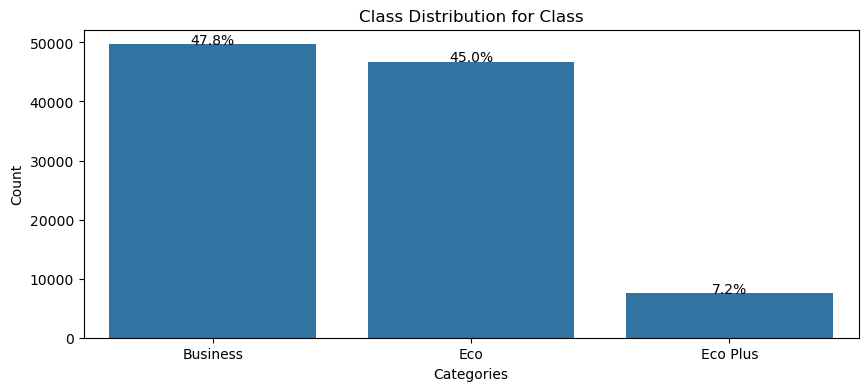

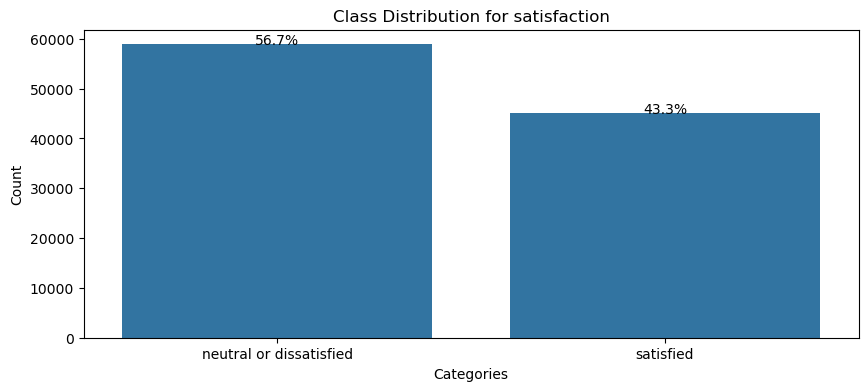

          feature  classes  imbalance_ratio
3           Class        3             6.63
1   Customer Type        2             4.47
2  Type of Travel        2             2.22
4    satisfaction        2             1.31
0          Gender        2             1.03


In [7]:
def check_class_imbalance(df, plot=True):
    """
    Analyze class distribution for categorical features with visualization

    Parameters:
    df (DataFrame): Input dataframe
    plot (bool): Whether to display bar plots (default=True)

    Returns:
    DataFrame: Summary of class distributions with percentages
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.preprocessing import LabelEncoder

    # Select categorical features
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    if not cat_cols:
        print("No categorical columns found")
        return None

    # Calculate class distributions
    results = []
    for col in cat_cols:
        # Get value counts and percentages
        counts = df[col].value_counts(dropna=False)
        percentages = df[col].value_counts(normalize=True, dropna=False).mul(100).round(2)

        # Store results
        results.append({
            'feature': col,
            'classes': len(counts),
            'most_common': counts.idxmax(),
            'most_common_pct': percentages.max(),
            'least_common': counts.idxmin(),
            'least_common_pct': percentages.min(),
            'imbalance_ratio': round(counts.max() / counts.min(), 2)
        })

        # Plot distribution
        if plot:
            plt.figure(figsize=(10, 4))
            ax = sns.barplot(x=counts.index.astype(str), y=counts.values)
            plt.title(f'Class Distribution for {col}')
            plt.xlabel('Categories')
            plt.ylabel('Count')

            # Add percentage labels
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x() + p.get_width()/2., height + 3,
                        f'{height/len(df)*100:.1f}%',
                        ha='center')
            plt.show()

    # Create summary dataframe
    summary_df = pd.DataFrame(results).sort_values('imbalance_ratio', ascending=False)

    return summary_df
# Generate imbalance report
imbalance_report = check_class_imbalance(df)

# Display summary
print(imbalance_report[['feature', 'classes', 'imbalance_ratio']])

In [8]:
bins = [0, 12, 18, 35, 50, 65, 100]
labels = ['0-12', '13-18', '19-35', '36-50', '51-65', '66-100']

# Apply binning
df['age_range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
df.drop(columns=['Age'], inplace=True)

### Understand Target Variable
We can see that our target distribution isn't very imbalanced. The ratio is approximately `1.31:1`. So, we'll not need to use SMOTE or do class imbalance handling in this case.

Now we dive into feature exploration

## Feature Exploration

### Univariate Analysis

In [10]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
#
# def analyze_numerical(df, column):
#     """Analyze numerical variables with summary stats and visualizations"""
#     print(f"\n=== Numerical Analysis for {column} ===")
#
#     # Summary statistics4
#     print(df[column].describe())
#
#     # Distribution plot
#     plt.figure(figsize=(12, 5))
#     plt.subplot(1, 2, 1)
#     sns.histplot(df[column], kde=True)
#     plt.title(f'Distribution of {column}')
#
#     # Box plot
#     plt.subplot(1, 2, 2)
#     sns.boxplot(x=df[column])
#     plt.title(f'Box Plot of {column}')
#     plt.tight_layout()
#     plt.show()
#
# def analyze_categorical(df, column):
#     """Analyze categorical variables with frequency tables and charts"""
#     print(f"\n=== Categorical Analysis for {column} ===")
#
#     # Frequency table
#     freq = df[column].value_counts(normalize=True)
#     print(freq.to_markdown())
#
#     # Bar plot
#     plt.figure(figsize=(10, 5))
#     sns.countplot(x=column, data=df, order=freq.index)
#     plt.title(f'Distribution of {column}')
#     plt.xticks(rotation=45)
#     plt.show()
#
# # Example usage
# if __name__ == "__main__":
#     # Analyze numerical variable
#     analyze_numerical(df, 'Age')
#
#     # Analyze categorical variable
#     analyze_categorical(df, 'Class')

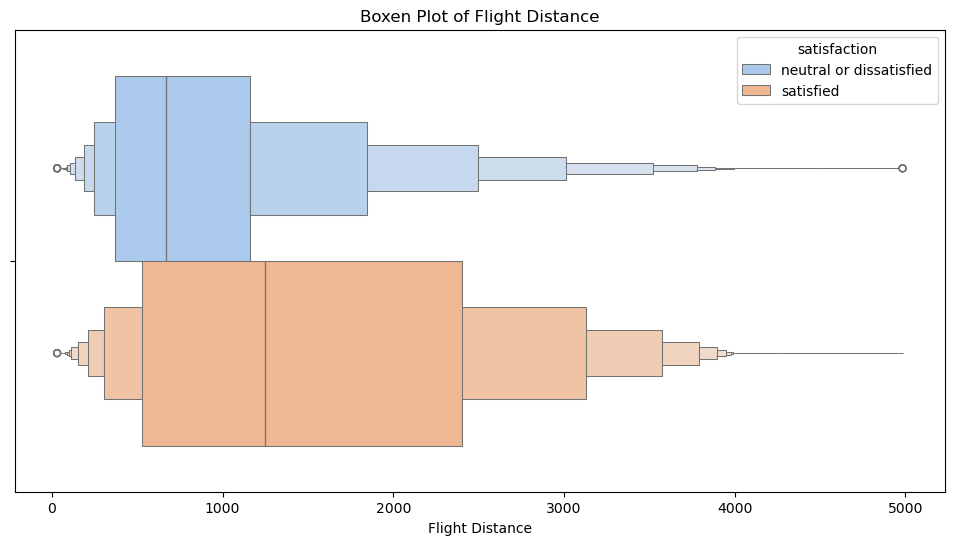

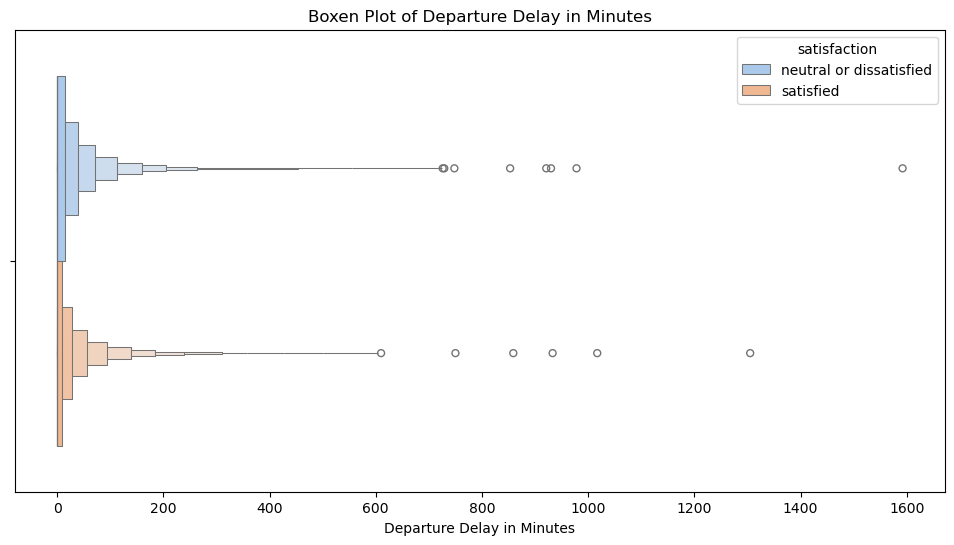

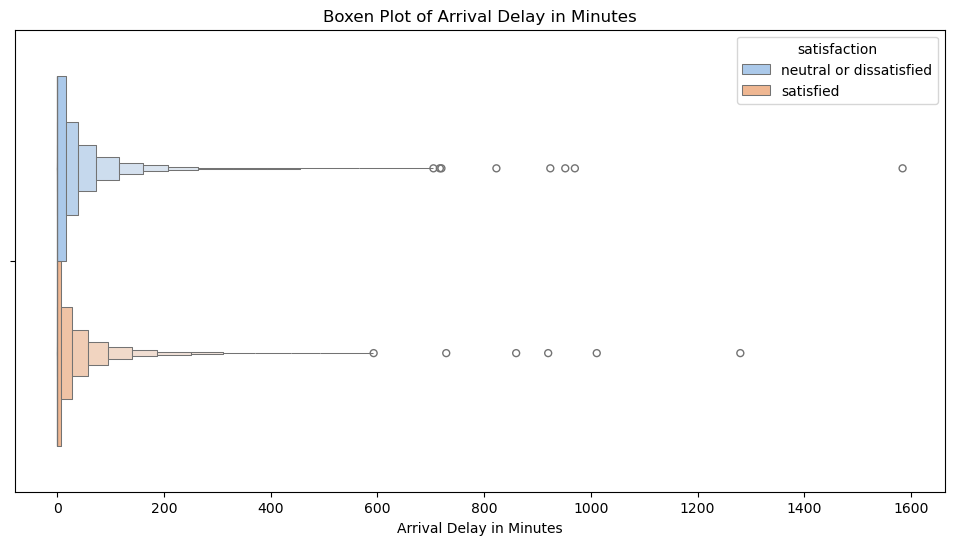

In [11]:
for col in df.columns:
    if df[col].nunique() >= 10:
        plt.figure(figsize=(12, 6))
        sns.boxenplot(x=df[col], hue=df['satisfaction'], palette='pastel')
        plt.title(f'Boxen Plot of {col}')
        plt.show()

So here we can see that the customers are both satisfied and not satisfied for arrival delay and departure delay. In this case, we need to see if it is evenly distributed and find out what and how many outliers are there using Z score, IQR, and percentile method. Then finally, we will determine how to handle these outliers. Should we drop, cap them, or use log transformation?

In [12]:
df[(df['Departure Delay in Minutes'] > 0) & (df['Arrival Delay in Minutes'] > 0) & (df['satisfaction'] == 'satisfied')].shape[0]

12884

### Bivariate Analysis

In [13]:
# cols = []
# for col in df.columns:
#     if df[col].nunique() > 10:
#         cols.append(col)
#
# cols.append('satisfaction')
# features = df[cols]
# sns.pairplot(features, hue='satisfaction')

# Data Preprocessing

## Handling Missing Values

In [14]:
# Simply drop the missing value rows
def drop_missing(df):
    print("======================= Dropping missing values =======================")
    size = df.shape[0]
    df = df.dropna(axis=0)
    print(f'Total rows dropped: {size - df.shape[0]}')
    print('======================= Dropped missing values! =======================')
    return df


# Advanced imputation using KNN
def advanced_impute(df):
    from sklearn.impute import KNNImputer

    imputer = KNNImputer(n_neighbors=1000)
    imputed_data = imputer.fit_transform(df)
    df = pd.DataFrame(imputed_data, columns=df.columns)
    return df

# Simple imputation using 'Mean', 'Median' or 'Mode'
def simple_impute(df, method='median'):
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy=method)
    imputed_data = imputer.fit_transform(df)
    df = pd.DataFrame(imputed_data, columns=df.columns)
    return df

df = drop_missing(df)
# df = simple_impute(df, 'median')
# df = advanced_impute(df)

======================= Dropping missing values =======================
Total rows dropped: 310
======================= Dropped missing values! =======================


## Feature Engineering

### Convert Categorical values

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def auto_encode_and_merge(df, target_col, one_hot_threshold=10):
    """
    Automatically encode categorical columns in a DataFrame using label or one-hot encoding,
    ensuring the target column is always label-encoded, and merge the encoded columns back into the original DataFrame.

    Parameters:
    - df: pandas DataFrame containing the data.
    - target_col: String name of the target column to always be label-encoded.
    - one_hot_threshold: Integer threshold for the number of unique categories to decide between label and one-hot encoding for other columns.

    Returns:
    - df_encoded: DataFrame with original non-categorical columns and encoded categorical columns.
    """
    # Copy the DataFrame to avoid modifying the original
    df_encoded = df.copy()

    # Identify categorical columns excluding the target column
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    categorical_cols.remove(target_col)

    # Initialize encoders
    label_encoders = {}
    one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')

    # Encode the target column with label encoding
    # df_encoded[target_col] = df_encoded[target_col].fillna('Missing')
    label_encoders[target_col] = LabelEncoder()
    df_encoded[target_col] = label_encoders[target_col].fit_transform(df_encoded[target_col])

    for col in categorical_cols:
        # Fill missing values with a placeholder
        # df_encoded[col] = df_encoded[col].fillna('Missing')

        # Determine the number of unique categories
        num_unique = df_encoded[col].nunique()

        if num_unique <= one_hot_threshold:
            # Apply one-hot encoding
            one_hot_encoded_array = one_hot_encoder.fit_transform(df_encoded[[col]])
            one_hot_encoded_df = pd.DataFrame(one_hot_encoded_array, columns=one_hot_encoder.get_feature_names_out([col]))

            # Drop the original column and concatenate the one-hot encoded columns
            df_encoded = df_encoded.drop(columns=[col]).reset_index(drop=True)
            df_encoded = pd.concat([df_encoded, one_hot_encoded_df], axis=1)

        else:
            # Apply label encoding
            label_encoders[col] = LabelEncoder()
            df_encoded[col] = label_encoders[col].fit_transform(df_encoded[col])

    return df_encoded


df = auto_encode_and_merge(df, target_col='satisfaction', one_hot_threshold=10)

### Handle Outliers

In [16]:
def cap_outliers(df, method="zscore", threshold=3):
    """
    Cap outliers in a DataFrame using specified methods.

    Parameters:
    - df: pandas DataFrame containing numeric data.
    - method: String specifying the outlier detection method. Options are "zscore", "iqr", or "percentile".
    - threshold: Numeric value determining the threshold for capping outliers.

    Returns:
    - A DataFrame with outliers capped.
    """
    df_capped = df.copy()

    if method == "zscore":
        # Calculate Z-scores column-wise
        z_scores = np.abs((df_capped - df_capped.mean(axis=0)) / df_capped.std(axis=0, ddof=0))
        # Cap the outliers
        df_capped[z_scores > threshold] = np.sign(df_capped[z_scores > threshold]) * (threshold * df_capped.std(axis=0, ddof=0) + df_capped.mean(axis=0))

    elif method == "iqr":
        # Calculate quartiles column-wise
        Q1 = df_capped.quantile(0.25, axis=0)
        Q3 = df_capped.quantile(0.75, axis=0)
        IQR = Q3 - Q1
        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap the outliers
        df_capped = df_capped.clip(lower=lower_bound, upper=upper_bound, axis=1)

    elif method == "percentile":
        # Calculate percentile bounds column-wise
        lower = df_capped.quantile(0.01, axis=0)
        upper = df_capped.quantile(0.99, axis=0)
        # Cap the outliers
        df_capped = df_capped.clip(lower=lower, upper=upper, axis=1)

    else:
        raise ValueError(f"Method '{method}' not recognized. Choose from 'zscore', 'iqr', or 'percentile'.")

    return df_capped

df_capped = cap_outliers(df, method="iqr")

In [17]:
def remove_outliers(df, method="zscore", threshold=3):
    df_clean = df.copy()

    if method == "zscore":
        z_scores = np.abs((df_clean - df_clean.mean()) / df_clean.std())
        df_clean = df_clean[(z_scores < threshold).all(axis=1)]

    elif method == "iqr":
        Q1 = df_clean.quantile(0.25)
        Q3 = df_clean.quantile(0.75)
        IQR = Q3 - Q1
        df_clean = df_clean[~((df_clean < (Q1 - 1.5 * IQR)) | (df_clean > (Q3 + 1.5 * IQR))).any(axis=1)]

    elif method == "percentile":
        lower, upper = df_clean.quantile(0.01), df_clean.quantile(0.99)
        df_clean = df_clean[(df_clean >= lower) & (df_clean <= upper)].dropna()

    return df_clean

df_removed = remove_outliers(df, method="iqr")

In [18]:
def log_transform(df, column_name, shift=0):
    """
    Apply a log transformation to a specified column in a DataFrame to handle outliers.

    Parameters:
    - df: pandas DataFrame containing the data.
    - column_name: Name of the column to transform.
    - shift: Optional parameter to add a constant to the data to handle zero or negative values.

    Returns:
    - A DataFrame with the transformed column.
    """
    # Ensure the data is positive by adding a shift if necessary
    if (df[column_name] <= 0).any():
        df[column_name] += shift

    # Apply the log transformation
    df[column_name] = np.log(df[column_name])

    return df

cols = ['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Flight Distance']
for col in cols:
    df_transformed = log_transform(df, col, shift=1)

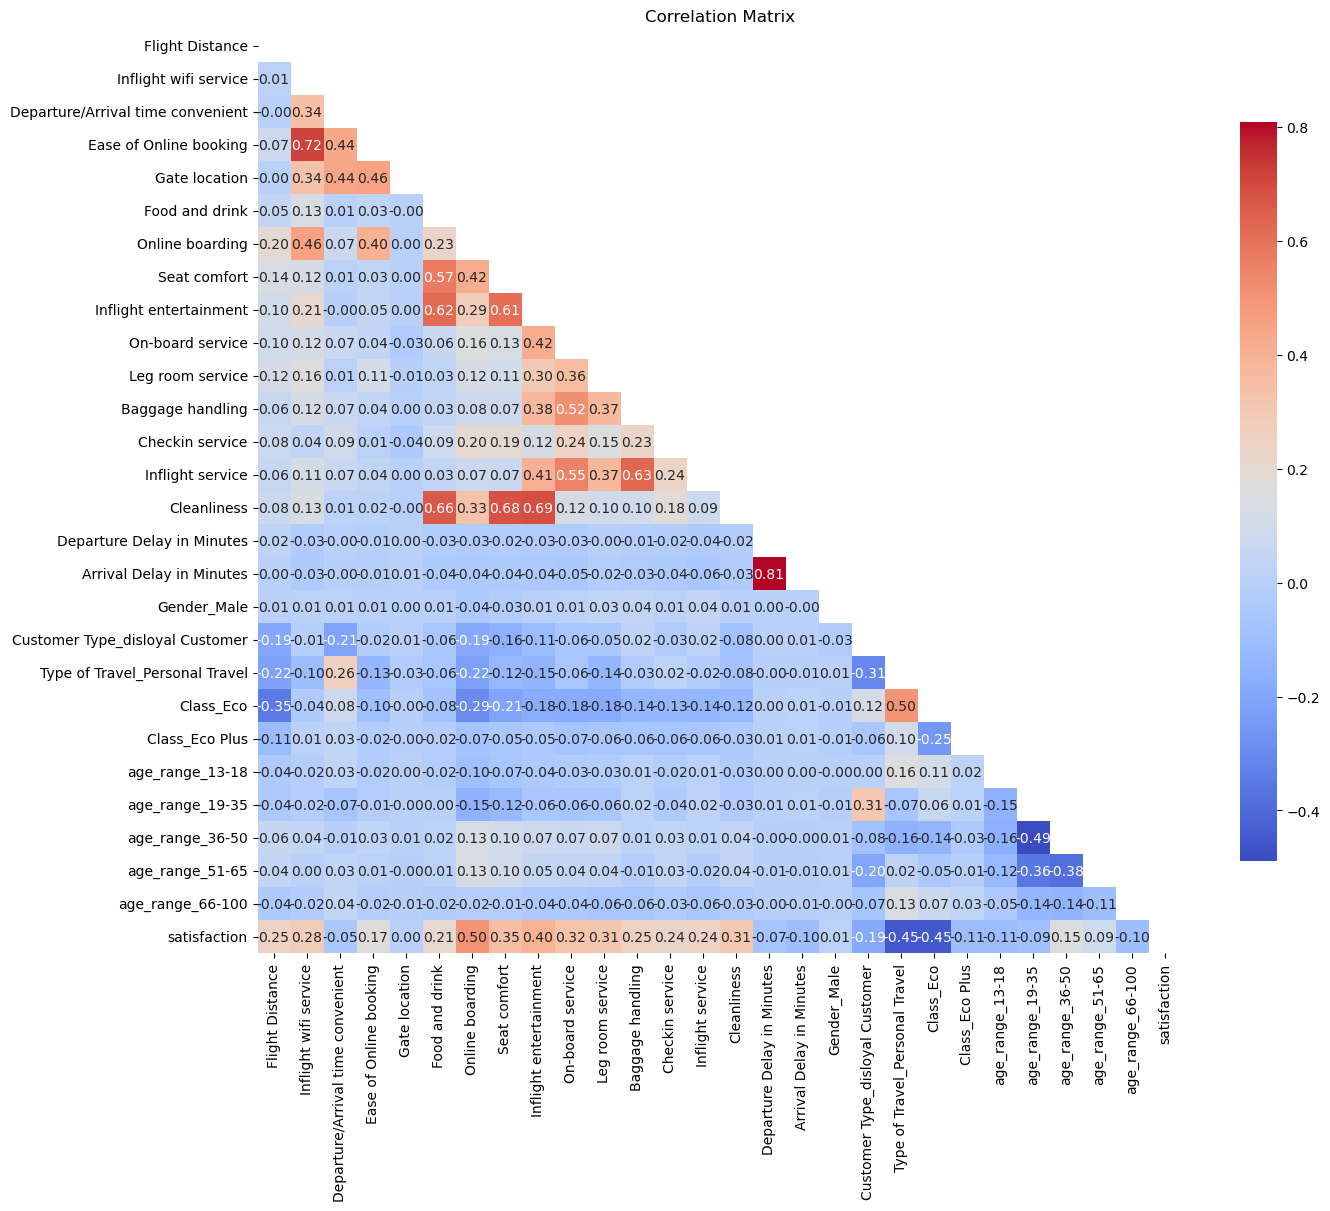

In [19]:
df = df[[col for col in df.columns if col != 'satisfaction'] + ['satisfaction']]

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 12))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

def train(df):
    X = df.drop(columns=['satisfaction'])
    y = df['satisfaction']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize and train the baseline model
    baseline_model = LogisticRegression(random_state=42, max_iter=100000)
    baseline_model.fit(X_train, y_train)

    # Make predictions
    y_pred = baseline_model.predict(X_test)


    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, baseline_model.predict_proba(X_test)[:, 1])
    report = classification_report(y_test, y_pred)

    print(f"Baseline Model Accuracy: {accuracy:.4f}")
    print(f"Baseline Model ROC AUC: {roc_auc:.4f}")
    # print("\nClassification Report:")
    # print(report)


In [ ]:
import pandas as pd

def create_interaction_features(df, target_column, correlation_threshold=0.5):
    correlation_matrix = df.corr()
    target_correlations = correlation_matrix[target_column].abs()
    high_corr_features = target_correlations[target_correlations > correlation_threshold].index.tolist()
    
    # Exclude the target column from high_corr_features
    high_corr_features.remove(target_column)

    interaction_features = []

    for i in range(len(high_corr_features)):
        for j in range(i + 1, len(high_corr_features)):
            feature1 = high_corr_features[i]
            feature2 = high_corr_features[j]
            interaction_feature_name = f"{feature1}_x_{feature2}"
            df[interaction_feature_name] = df[feature1] * df[feature2]
            interaction_features.append(interaction_feature_name)

    multicollinearity_candidates = set()
    for i in range(len(high_corr_features)):
        for j in range(i + 1, len(high_corr_features)):
            feature1 = high_corr_features[i]
            feature2 = high_corr_features[j]
            if abs(correlation_matrix.loc[feature1, feature2]) > correlation_threshold:
                multicollinearity_candidates.add(feature1)
                multicollinearity_candidates.add(feature2)

    features_to_remove = []
    for feature in multicollinearity_candidates:
        if target_correlations[feature] < correlation_threshold:
            features_to_remove.append(feature)

    df.drop(columns=features_to_remove, inplace=True)

    return df, interaction_features, features_to_remove

# df, _, _ = create_interaction_features(df, target_column='satisfaction', correlation_threshold=0.3)

In [23]:
df.shape

(103594, 56)

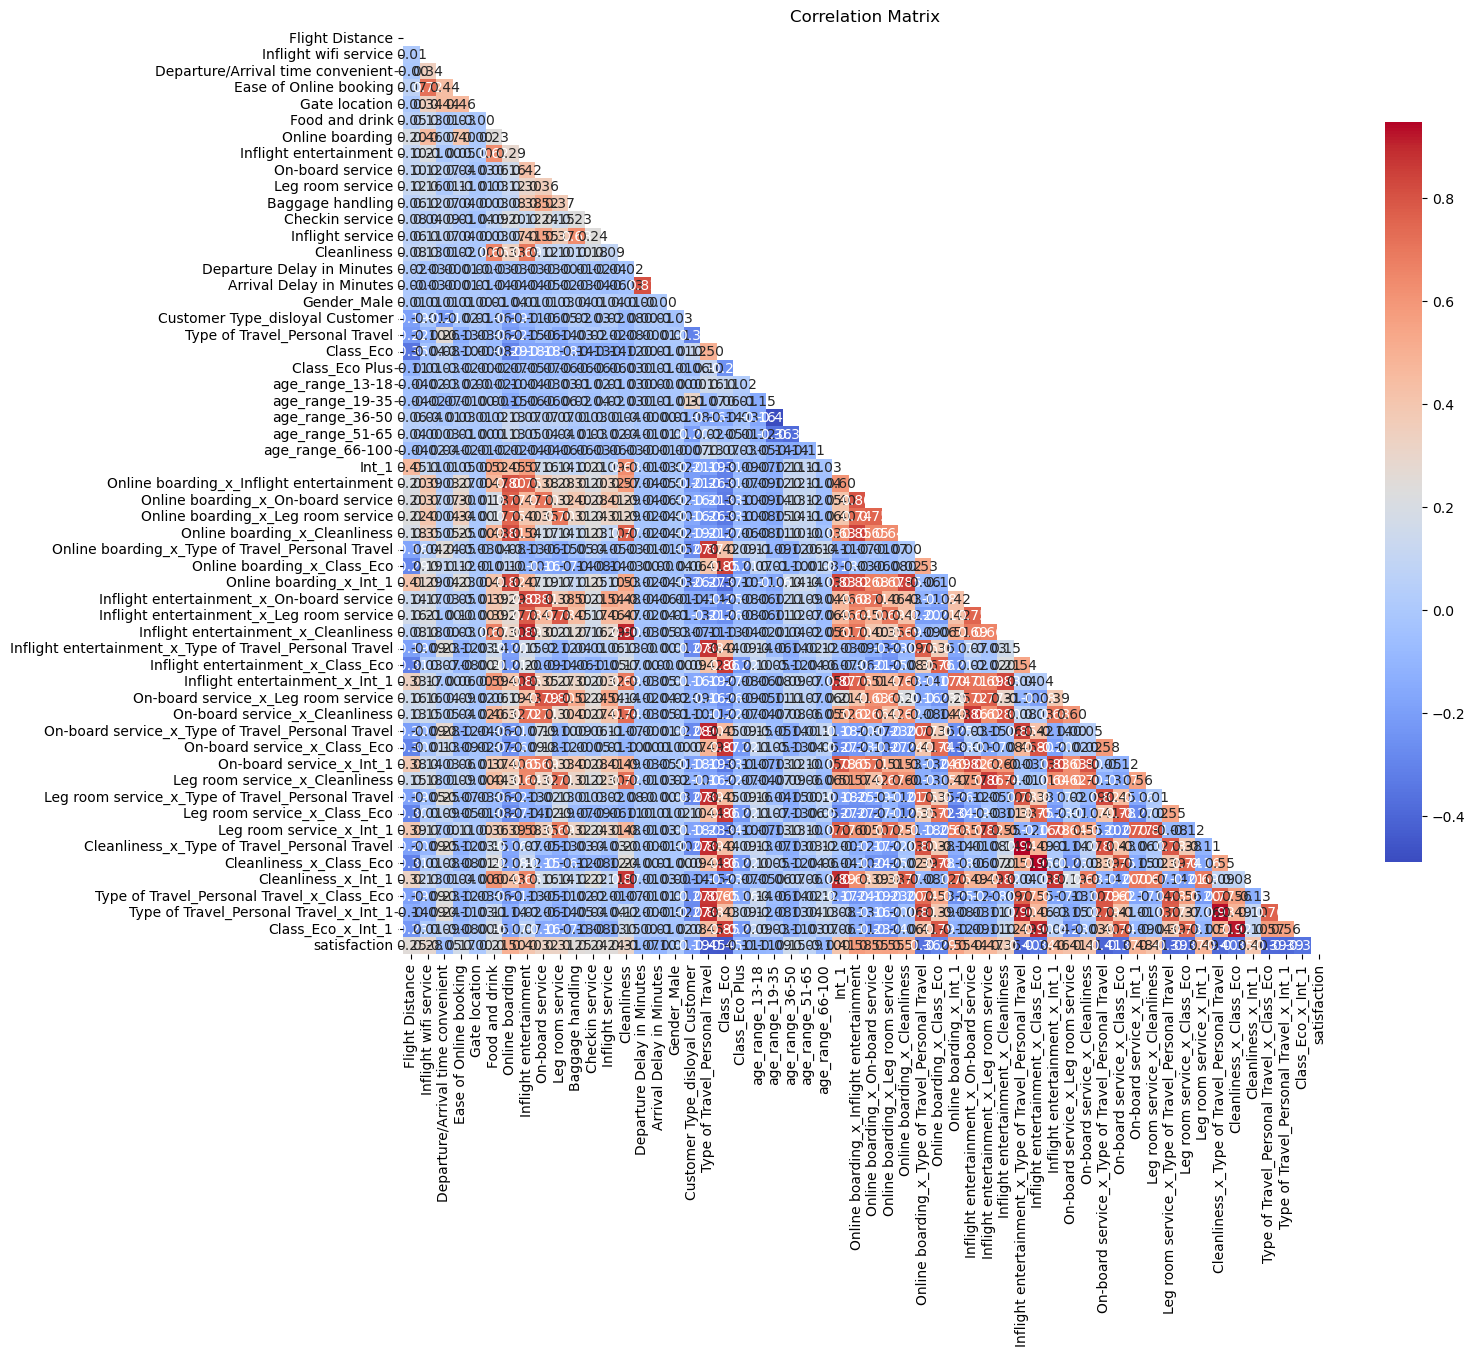

In [24]:
df = df[[col for col in df.columns if col != 'satisfaction'] + ['satisfaction']]

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 12))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [25]:
cols = ['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Flight Distance']
for col in cols:
    df = log_transform(df, col, shift=1)

In [26]:
print('==================================== When outliers are removed =====================================')
train(df_removed)
print('==================================== When outliers are capped ======================================')
train(df_capped)
print('================================== When outliers are transformed ===================================')
train(df)

==================================== When outliers are removed =====================================
Baseline Model Accuracy: 0.8962
Baseline Model ROC AUC: 0.9503
==================================== When outliers are capped ======================================
Baseline Model Accuracy: 0.8576
Baseline Model ROC AUC: 0.9143
================================== When outliers are transformed ===================================
Baseline Model Accuracy: 0.8808
Baseline Model ROC AUC: 0.9287


`==================================== When outliers are removed =====================================
Baseline Model Accuracy: 0.8962
Baseline Model ROC AUC: 0.9503
==================================== When outliers are capped ======================================
Baseline Model Accuracy: 0.8576
Baseline Model ROC AUC: 0.9143
================================== When outliers are transformed ===================================
Baseline Model Accuracy: 0.8740
Baseline Model ROC AUC: 0.9243`

In [27]:
# import os
# os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Set this to the number of cores you want to use

# import xgboost as xgb
# import lightgbm as lgb
# from catboost import CatBoostClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, r2_score
# from sklearn.preprocessing import MinMaxScaler
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Taking only transformed data
# X = df_transformed.drop(columns=['satisfaction'])
# y = df_transformed['satisfaction']

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# lgbm_params = {'n_estimators': 291, 'learning_rate': 0.033236472434062025, 'max_depth': 14, 'num_leaves': 73, 'min_child_samples': 15, 'subsample': 0.6452608030046519, 'colsample_bytree': 0.7351330578836698}
# rf_params = {'n_estimators': 383, 'max_depth': 15, 'min_samples_split': 5, 'max_features': 'sqrt', 'criterion': 'entropy'}
# cb_params = {'iterations': 485, 'learning_rate': 0.02451154055716572, 'depth': 8, 'l2_leaf_reg': 1.312879755477539}
# xgb_params = {'max_depth': 15, 'learning_rate': 0.12204550084705108, 'n_estimators': 61, 'min_child_weight': 1.9190931783540948, 'subsample': 0.9329682809203258, 'colsample_bytree': 0.7196095681095573, 'gamma': 2.3019670579460234}

# models = {
#     'XGBoost': xgb.XGBClassifier(**xgb_params, random_state=42),
#     'Random Forest': RandomForestClassifier(**rf_params, random_state=42),
#     'LightGBM': lgb.LGBMClassifier(**lgbm_params, random_state=42, verbose=-1),
#     'CatBoost': CatBoostClassifier(**cb_params, random_seed=42, verbose=False)
# }

# # Dictionary to store predictions
# predictions = {}
# # Dictionary to store all feature importances
# all_importances = {}
# # Dictionary to store model metrics
# model_metrics = {}

# # Train models and display individual results
# for name, model in models.items():
#     print(f"\n{'-'*50}")
#     print(f"{name} Results:")

#     # Train the model
#     model.fit(X_train_scaled, y_train)
    
#     # Make predictions
#     predictions[name] = model.predict(X_test_scaled)
    
#     # Get feature importances
#     importances = pd.DataFrame({
#         'feature': X_train.columns, 
#         'importance': model.feature_importances_
#     }).sort_values('importance', ascending=False)
    
#     # Store the importances in the dictionary
#     all_importances[name] = importances
    
#     # Calculate and store metrics
#     accuracy = accuracy_score(y_test, predictions[name])
#     roc_auc = roc_auc_score(y_test, predictions[name])
#     r2 = r2_score(y_test, predictions[name])
    
#     model_metrics[name] = {
#         'accuracy': accuracy,
#         'roc_auc': roc_auc,
#         'r2': r2
#     }
    
#     # Print metrics
#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"ROC AUC: {roc_auc:.4f}")
#     print(f"R2 Score: {r2:.4f}")
    
#     # Print top 10 feature importances
#     print("\nTop 10 Feature Importances:")
#     print(importances.head(10))

# # Now you can analyze the feature importances across models

# # Function to normalize feature importances (optional)
# def normalize_importances(importance_df):
#     """Normalize importances to sum to 1"""
#     importance_df['importance_normalized'] = importance_df['importance'] / importance_df['importance'].sum()
#     return importance_df

# # Normalize all importances
# for name in all_importances:
#     all_importances[name] = normalize_importances(all_importances[name])

# # Create a combined dataframe for easier analysis
# combined_importances = pd.DataFrame(index=X_train.columns)

# for name, imp_df in all_importances.items():
#     # Set the model's importances as a column in the combined dataframe
#     combined_importances[name] = imp_df.set_index('feature')['importance_normalized']

# # Calculate average importance across all models
# combined_importances['Average'] = combined_importances.mean(axis=1)
# combined_importances = combined_importances.sort_values('Average', ascending=False)

# print("\n" + "="*50)
# print("Feature Importance Analysis")
# print("="*50)
# print("\nTop 15 Features by Average Importance:")
# print(combined_importances.head(15))

# # Calculate feature importance rank correlation between models
# print("\nFeature Importance Rank Correlation Between Models:")
# rank_correlation = combined_importances.drop(columns=['Average']).rank(ascending=False).corr(method='spearman')
# print(rank_correlation)

# # Visualize top 10 features by average importance
# plt.figure(figsize=(12, 8))
# combined_importances.head(10)['Average'].sort_values().plot(kind='barh')
# plt.title('Top 10 Features by Average Importance')
# plt.xlabel('Average Normalized Importance')
# plt.tight_layout()
# plt.savefig('top_features_by_importance.png')
# plt.close()

# # Visualize feature importance heatmap for top 15 features
# plt.figure(figsize=(14, 10))
# sns.heatmap(
#     combined_importances.head(15).drop(columns=['Average']), 
#     annot=True, 
#     cmap='YlGnBu', 
#     linewidths=.5
# )
# plt.title('Feature Importance Across Models (Top 15 Features)')
# plt.tight_layout()
# plt.savefig('feature_importance_heatmap.png')
# plt.close()

# # Save all the feature importances to CSV files for further analysis
# for name, imp_df in all_importances.items():
#     imp_df.to_csv(f'{name}_feature_importances.csv', index=False)

# # Save the combined feature importances
# combined_importances.to_csv('combined_feature_importances.csv')

# # Create a feature importance consistency score
# # (how consistently a feature ranks in the top N across models)
# def calculate_consistency_score(combined_df, top_n=10):
#     """Calculate how consistently features appear in the top N across models"""
#     model_columns = [col for col in combined_df.columns if col != 'Average']
#     consistency_scores = {}
    
#     for feature in combined_df.index:
#         # Count how many times this feature appears in top N for each model
#         in_top_n_count = sum(
#             1 for model in model_columns 
#             if feature in combined_df.sort_values(model, ascending=False).head(top_n).index
#         )
#         consistency_scores[feature] = in_top_n_count / len(model_columns)
    
#     return pd.Series(consistency_scores).sort_values(ascending=False)

# consistency_scores = calculate_consistency_score(combined_importances)
# print(f"\nFeature Consistency Scores (Top 10):")
# print(consistency_scores.head(10))

# # Save consistency scores
# consistency_scores.to_csv('feature_consistency_scores.csv')

# print("\nAll feature importance data has been saved to CSV files for further analysis.")

In [28]:
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split

# X = df_transformed.drop(columns=['satisfaction'])
# y = df_transformed['satisfaction']
# feature_names = X.columns.tolist()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = RandomForestClassifier(random_state=42)
# rfe = RFE(model, n_features_to_select=10)
# rfe.fit(X_train, y_train)

# selected_features = np.array(feature_names)[rfe.support_]
# feature_importances = rfe.estimator_.feature_importances_

# sorted_idx = np.argsort(feature_importances)[-15:]
# plt.figure(figsize=(10, 5))
# plt.barh(np.array(selected_features)[sorted_idx], feature_importances[sorted_idx], color="skyblue")
# plt.xlabel("Importance")
# plt.ylabel("Features")
# plt.title("Top Features Selected by RFE")
# plt.show()

# print(selected_features.tolist())

['Age', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'Leg room service', 'Type of Travel_Personal Travel', 'Class_Eco']



In [29]:
# features = selected_features.tolist()

In [30]:
# from itertools import combinations

# def create_interactions(df, feature_list):
#     for feat1, feat2 in combinations(feature_list, 2):
#         df[f'{feat1}_x_{feat2}'] = (df[feat1] ** 2) * (df[feat2] ** 4)
#     return df

def remove_collinearity_with_target(df, target_col, threshold=0.90):
    X = df.drop(columns=[target_col])
    target_corr = abs(X.corrwith(df[target_col]))
    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = []
    
    for col in upper.columns:
        correlated_features = upper[col][upper[col] > threshold].index
        for feat in correlated_features:
            if target_corr[col] < target_corr[feat]:
                to_drop.append(col)
                break
    
    return df.drop(columns=to_drop)

# features = ['Inflight wifi service', 'Online boarding', 'Inflight entertainment', 'Seat comfort']

# df = create_interactions(df, features)
df = remove_collinearity_with_target(df, 'satisfaction', 0.80)

In [33]:
# df_ = df[['Inflight wifi service', 'Online boarding',
#        'Inflight entertainment', 'Seat comfort',
#        'Type of Travel_Personal Travel',
#        'Customer Type_disloyal Customer', 'Gate location',
#        'Leg room service', 'Ease of Online booking', 'Inflight service',
#        'Baggage handling', 'Class_Eco', 'Checkin service',
#        'Flight Distance', 'On-board service', 'Cleanliness']]
# df_['satisfaction'] = df['satisfaction']
# train(df_)

In [39]:
def remove_low_correlation_columns(dataframe, target_column, threshold=0.1):
    """
    Removes columns with correlation lower than the specified threshold with the target column.
    
    :param dataframe: pandas DataFrame containing the data
    :param target_column: Name of the target column
    :param threshold: Correlation threshold for removal
    :return: DataFrame with low-correlation columns removed
    """
    # Calculate the correlation matrix
    corr_matrix = dataframe.corr()
    
    # Get the correlations of all columns with the target column
    target_corr = corr_matrix[target_column]
    
    # Identify columns with correlation less than the threshold (excluding the target column itself)
    cols_to_remove = target_corr[abs(target_corr) < threshold].index
    cols_to_remove = cols_to_remove.drop(target_column, errors='ignore')
    
    # Remove the identified columns
    cleaned_dataframe = dataframe.drop(cols_to_remove, axis=1)
    
    return cleaned_dataframe

def remove_high_collinearity(df, threshold=0.90):
    """
    Remove highly collinear features from the DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    threshold (float): The correlation threshold for collinearity.

    Returns:
    pd.DataFrame: The DataFrame with collinear features removed.
    """
    # Calculate the correlation matrix
    correlation_matrix = df.corr().abs()
    
    # Get the upper triangle of the correlation matrix
    upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    
    # Find features with correlation greater than the threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    # Drop the collinear features
    df_reduced = df.drop(columns=to_drop)
    
    return df_reduced

df = remove_low_correlation_columns(df, target_column='satisfaction', threshold=0.1)
df = remove_high_collinearity(df, 0.70)

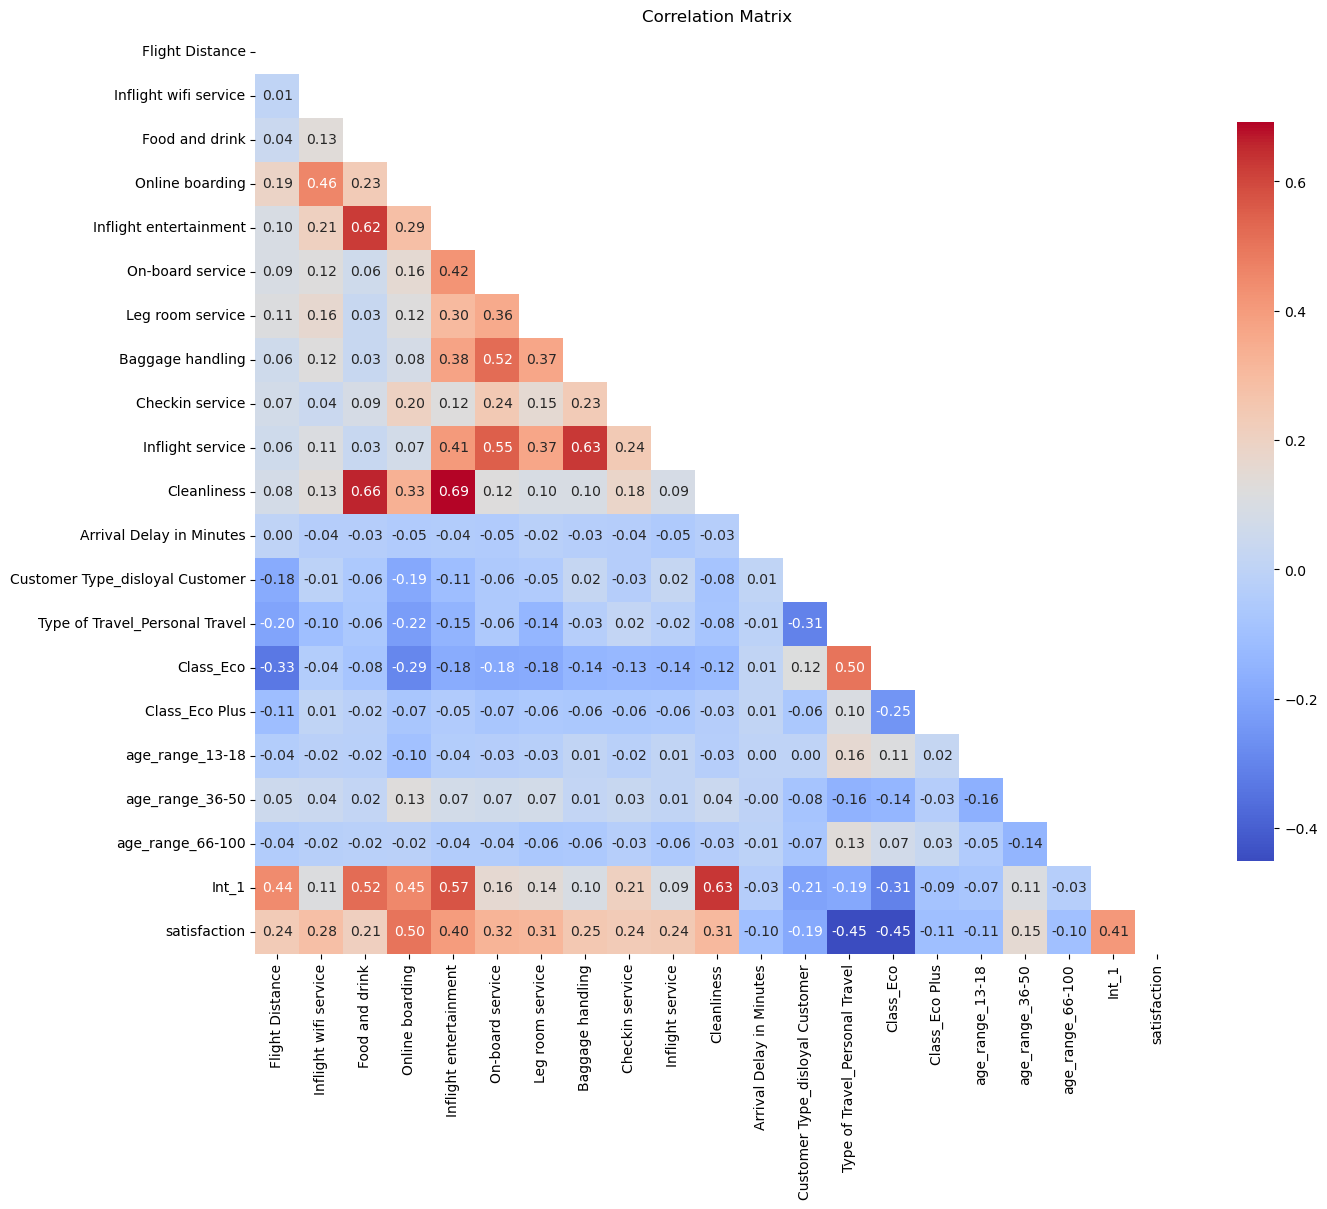

In [40]:
df = df[[col for col in df.columns if col != 'satisfaction'] + ['satisfaction']]

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15, 12))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [41]:
print('================================== When outliers are transformed ===================================')
train(df)

================================== When outliers are transformed ===================================
Baseline Model Accuracy: 0.8727
Baseline Model ROC AUC: 0.9231


In [42]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Set this to the number of cores you want to use

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, r2_score
from sklearn.preprocessing import MinMaxScaler

# Taking only transformed data
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# lgbm_params = {'n_estimators': 291, 'learning_rate': 0.033236472434062025, 'max_depth': 14, 'num_leaves': 73, 'min_child_samples': 15, 'subsample': 0.6452608030046519, 'colsample_bytree': 0.7351330578836698}
# rf_params = {'n_estimators': 383, 'max_depth': 15, 'min_samples_split': 5, 'max_features': 'sqrt', 'criterion': 'entropy'}
# cb_params = {'iterations': 485, 'learning_rate': 0.02451154055716572, 'depth': 8, 'l2_leaf_reg': 1.312879755477539}
# xgb_params = {'max_depth': 15, 'learning_rate': 0.12204550084705108, 'n_estimators': 61, 'min_child_weight': 1.9190931783540948, 'subsample': 0.9329682809203258, 'colsample_bytree': 0.7196095681095573, 'gamma': 2.3019670579460234}
# cb_params = {'iterations': 157, 'learning_rate': 0.06146837587734029, 'depth': 10, 'l2_leaf_reg': 1.8321221762864344}

models = {
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42, verbose=-1),
    'CatBoost': CatBoostClassifier(random_seed=42, verbose=False)
}

# Dictionary to store predictions
predictions = {}

# Train models and display individual results
for name, model in models.items():
    print(f"\n{'-'*50}")
    print(f"{name} Results:")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions[name] = model.predict(X_test)

    # Print metrics
    print(f"Accuracy: {accuracy_score(y_test, predictions[name]):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, predictions[name]):.4f}")
    print(f"R2 Score: {r2_score(y_test, predictions[name]):.4f}")

    # # Print classification report
    # print("\nClassification Report:")
    # print(classification_report(y_test, predictions[name], digits=3))



--------------------------------------------------
XGBoost Results:
Accuracy: 0.9591
ROC AUC: 0.9567
R2 Score: 0.8339

--------------------------------------------------
Random Forest Results:
Accuracy: 0.9582
ROC AUC: 0.9555
R2 Score: 0.8300

--------------------------------------------------
LightGBM Results:
Accuracy: 0.9586
ROC AUC: 0.9557
R2 Score: 0.8319

--------------------------------------------------
CatBoost Results:
Accuracy: 0.9603
ROC AUC: 0.9577
R2 Score: 0.8386


`--------------------------------------------------
XGBoost Results:
Accuracy: 0.9633
ROC AUC: 0.9610
R2 Score: 0.8507

--------------------------------------------------
Random Forest Results:
Accuracy: 0.9613
ROC AUC: 0.9587
R2 Score: 0.8429

--------------------------------------------------
LightGBM Results:
Accuracy: 0.9647
ROC AUC: 0.9620
R2 Score: 0.8564

--------------------------------------------------
CatBoost Results:
Accuracy: 0.9649
ROC AUC: 0.9625
R2 Score: 0.8572`

In [37]:
import optuna
import xgboost as xgb
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
        'n_estimators': trial.suggest_int('n_estimators', 50, 100),
        'min_child_weight': trial.suggest_float('min_child_weight', 1, 20),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'random_state': 42
    }
    
    model = xgb.XGBClassifier(**param)
    skf = StratifiedKFold(n_splits=5)
    scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
    
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

print("Best parameters:", study.best_params)
print("Best cross-validation accuracy:", study.best_value)

best_model = xgb.XGBClassifier(**study.best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred))


[I 2025-03-07 21:00:56,351] A new study created in memory with name: no-name-d1fa94c3-0979-4b27-a04d-0fa12bc6777a
[I 2025-03-07 21:01:01,798] Trial 0 finished with value: 0.9579849170437406 and parameters: {'max_depth': 14, 'learning_rate': 0.08398860550626414, 'n_estimators': 53, 'min_child_weight': 6.724289710721942, 'subsample': 0.9851120886126958, 'colsample_bytree': 0.7022481430008692, 'gamma': 4.189418650525477}. Best is trial 0 with value: 0.9579849170437406.
[I 2025-03-07 21:01:06,814] Trial 1 finished with value: 0.956790346907994 and parameters: {'max_depth': 9, 'learning_rate': 0.25787509416010074, 'n_estimators': 63, 'min_child_weight': 13.02357587695371, 'subsample': 0.605527594701862, 'colsample_bytree': 0.8113374493041805, 'gamma': 1.8697523639587583}. Best is trial 0 with value: 0.9579849170437406.
[I 2025-03-07 21:01:10,128] Trial 2 finished with value: 0.9552699849170437 and parameters: {'max_depth': 6, 'learning_rate': 0.34263908330735776, 'n_estimators': 61, 'min_ch

KeyboardInterrupt: 